Name:Ankit Gaidhar

Roll no :28

ML Practical 6


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [ ]:
titanic = pd.read_excel('titanic.xlsx', index_col=0)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)

In [ ]:
titanic.drop(['Name','Ticket','SibSp','Cabin','Embarked','Parch'], axis=1, inplace=True)

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare
PassengerId,,,,,
1,0,3,male,22.0,7.2500
2,1,1,female,38.0,71.2833
3,1,3,female,26.0,7.9250
4,1,1,female,35.0,53.1000
5,0,3,male,35.0,8.0500


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 41.8+ KB


In [ ]:
survived = titanic['Survived']

In [ ]:
titanic.drop(['Survived'], axis=1, inplace=True)

In [ ]:
df = titanic

In [ ]:
df['Sex']=df['Sex'].replace({'male':1, 'female':0})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   Age     891 non-null    float64
 3   Fare    891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 34.8 KB


In [ ]:
df.head()

,Pclass,Sex,Age,Fare
PassengerId,,,,
1,3,1,22.0,7.2500
2,1,0,38.0,71.2833
3,3,0,26.0,7.9250
4,1,0,35.0,53.1000
5,3,1,35.0,8.0500


# SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, survived, test_size = 0.30, random_state=21)

In [ ]:
model=svm.SVC()

In [ ]:
model.fit(X_train, y_train)

SVC()

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
model.score(X_test, y_test)

0.6865671641791045

In [ ]:
cm = confusion_matrix(y_test, y_predict, labels=model.classes_)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

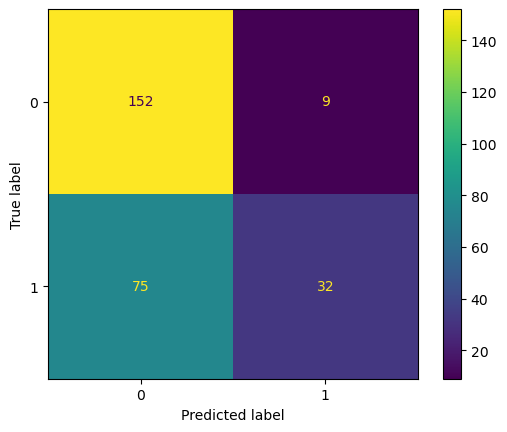

In [ ]:
disp.plot()

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.67      0.94      0.78       161
           1       0.78      0.30      0.43       107

    accuracy                           0.69       268
   macro avg       0.73      0.62      0.61       268
weighted avg       0.71      0.69      0.64       268



In [ ]:
model = svm.SVC(kernel='linear', gamma='auto', C=2)
model.fit(X_train, y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
model.score(X_test, y_test)

0.7873134328358209

In [ ]:
cm = confusion_matrix(y_test, y_predict, labels=model.classes_)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

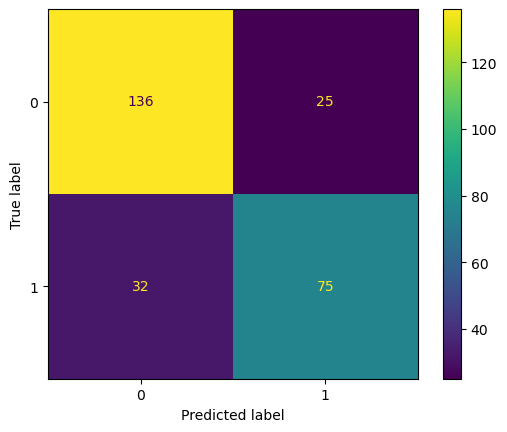

In [ ]:
disp.plot()

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       161
           1       0.75      0.70      0.72       107

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

grid = GridSearchCV(model, param_grid, refit=True, verbose=3)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.621 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.621 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.621 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.621 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.632 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.677 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.645 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.720 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.744 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.768 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.815 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.718 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.760 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.792 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))

[[135  26]
 [ 23  84]]


In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       161
           1       0.76      0.79      0.77       107

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

